# ANOVA - it assumes that the population median/mean is equal for all the categories. Using Anova we calculate the P value. Smaller the P value stronger the confidence/evidence to reject the initial hypothesis. So those categorical variables need to be considered which have smaller P values



# Variation between the median/mean of the categories in a categorical variable should be high and within the category should be less


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

In [63]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    print(ordering)
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).median()['SalePrice']
    print(ordering)
    ordering = ordering.sort_values('spmean')
    print(ordering)
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    print(ordering)
    ordering = ordering['ordering'].to_dict()
    print(ordering)
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature] = o


In [10]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = categorical
    pvals = []
    for c in categorical:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

In [47]:
categorical = ['Alley','BldgType','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','CentralAir',
               'Condition1','Condition2','Electrical','ExterCond','ExterQual','Exterior1st','Exterior2nd','Fence',
               'FireplaceQu','Foundation','Functional','GarageCond','GarageFinish','GarageQual','GarageType',
               'Heating','HeatingQC','HouseStyle','KitchenQual','LandContour','LandSlope','LotConfig','LotShape',
               'MSZoning','MasVnrType','MiscFeature','Neighborhood','PavedDrive','PoolQC','RoofMatl','RoofStyle',
               'SaleCondition','SaleType','Street','Utilities','MSSubClass', 'SimpleExterCond', 'SimpleBsmtQual']


In [12]:
dataset = pd.read_csv("/Users/pajhaver/Documents/Extra Learning/Kaggle/Getting Started/Housing_prices/train.csv")

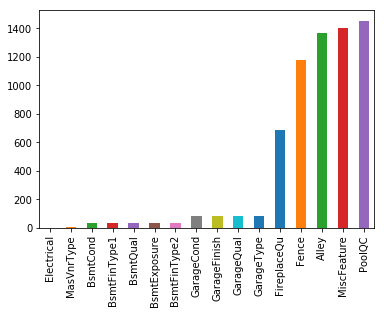

In [14]:
missing = dataset[categorical].isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

/anaconda2/envs/env_python_3.6/lib/python3.6/site-packages/scipy/stats/stats.py:2916: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))


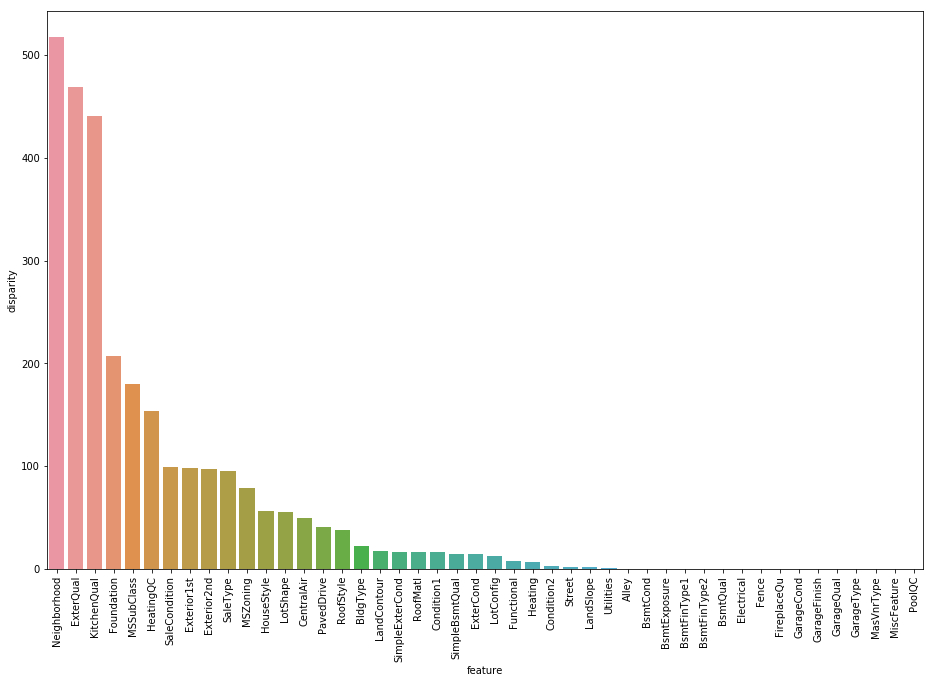

In [48]:
a = anova(dataset)
a['disparity'] = np.log(1./a['pval'].values)
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 10.27)
sns.barplot(data=a, x='feature', y='disparity', ax=ax)
x=plt.xticks(rotation=90)

In [16]:
for i in dataset.items():
    print(i)

('Id', 0          1
1          2
2          3
3          4
4          5
5          6
6          7
7          8
8          9
9         10
10        11
11        12
12        13
13        14
14        15
15        16
16        17
17        18
18        19
19        20
20        21
21        22
22        23
23        24
24        25
25        26
26        27
27        28
28        29
29        30
        ... 
1430    1431
1431    1432
1432    1433
1433    1434
1434    1435
1435    1436
1436    1437
1437    1438
1438    1439
1439    1440
1440    1441
1441    1442
1442    1443
1443    1444
1444    1445
1445    1446
1446    1447
1447    1448
1448    1449
1449    1450
1450    1451
1451    1452
1452    1453
1453    1454
1454    1455
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64)
('MSSubClass', 0        60
1        20
2        60
3        70
4        60
5        50
6        20
7        60
8        50
9       190
10       20
11       60
12 

In [54]:
new_categ = ['Neighborhood', 'ExterQual', 'KitchenQual', 'Foundation', 'MSSubClass', 'HeatingQC', 'SaleCondition', 
'Exterior1st', 'Exterior2nd', 'SaleType', 'MSZoning', 'SalePrice']
int_categorical_set = dataset[new_categ]

In [26]:
missing = int_categorical_set.isnull().sum()
print(missing)
for c in new_categ:
    int_categorical_set[c] = int_categorical_set[c].astype('category')
    if int_categorical_set[c].isnull().any():
        int_categorical_set[c] = int_categorical_set[c].cat.add_categories(['MISSING'])
        int_categorical_set[c] = int_categorical_set[c].fillna('MISSING')

Neighborhood     0
ExterQual        0
KitchenQual      0
Foundation       0
MSSubClass       0
HeatingQC        0
SaleCondition    0
Exterior1st      0
Exterior2nd      0
SaleType         0
MSZoning         0
dtype: int64


In [33]:
int_categorical_set.shape

(1460, 11)

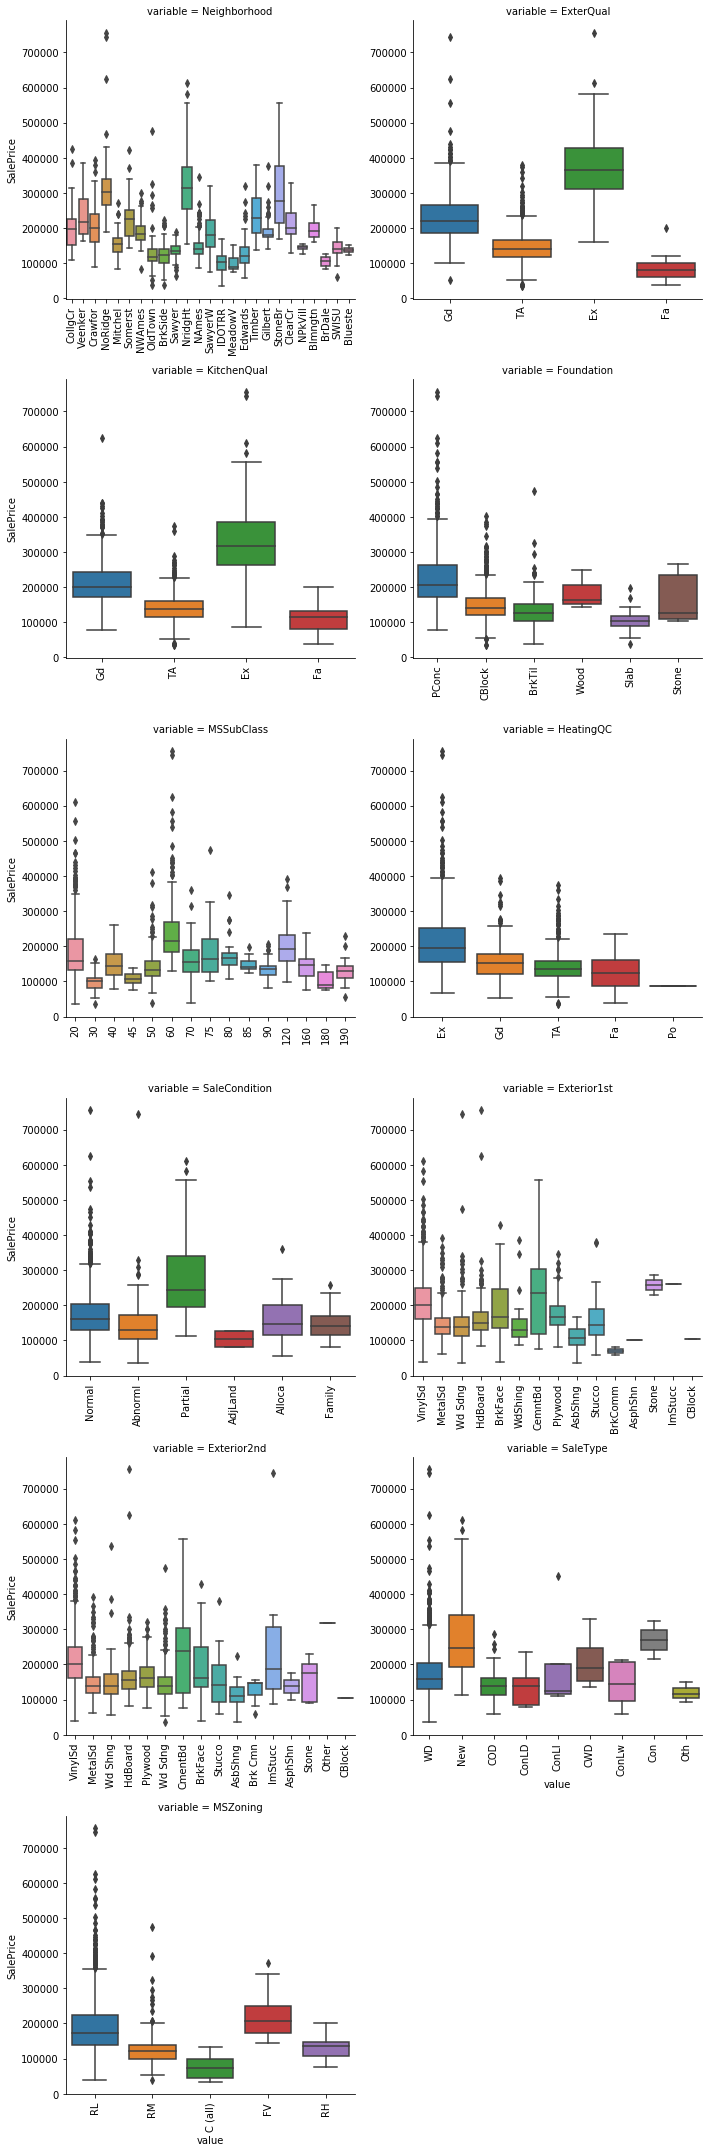

In [34]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(dataset, id_vars=['SalePrice'], value_vars=new_categ)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [46]:
dataset["SimpleBsmtQual"] = dataset.ExterCond.replace({'NA' : 'bad', 'Po' : 'bad', 'Fad' : 'bad','TA' : 'bad', # bad
                                                        'Gd' : 'good', # good
                                                       'Ex' : 'Excellent' 
                                                      })

/anaconda2/envs/env_python_3.6/lib/python3.6/site-packages/scipy/stats/stats.py:2916: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))


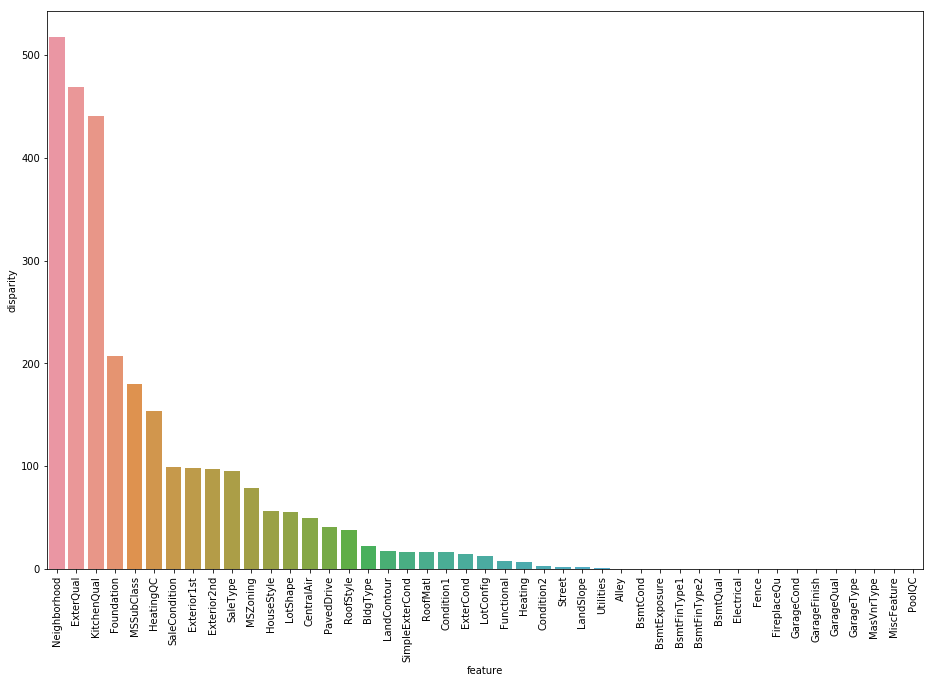

In [45]:
a = anova(dataset)
a['disparity'] = np.log(1./a['pval'].values)
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 10.27)
sns.barplot(data=a, x='feature', y='disparity', ax=ax)
x=plt.xticks(rotation=90)

In [38]:
dataset["SimpleExterCond"]

0       good
1       good
2       good
3       good
4       good
5       good
6       good
7       good
8       good
9       good
10      good
11      good
12      good
13      good
14      good
15      good
16      good
17      good
18      good
19      good
20      good
21      good
22      good
23      good
24      good
25      good
26      good
27      good
28      good
29      good
        ... 
1430    good
1431    good
1432    good
1433    good
1434    good
1435    good
1436    good
1437    good
1438    good
1439    good
1440    good
1441    good
1442    good
1443    good
1444    good
1445    good
1446    good
1447    good
1448    good
1449    good
1450    good
1451    good
1452    good
1453    good
1454    good
1455    good
1456    good
1457    good
1458    good
1459    good
Name: SimpleExterCond, Length: 1460, dtype: object

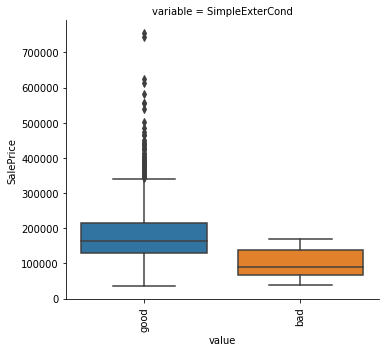

In [39]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(dataset, id_vars=['SalePrice'], value_vars=['SimpleExterCond'])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [55]:
one_hot_cols = ['ExterQual','KitchenQual','Foundation','HeatingQC','SaleCondition']
dataset_one_hot = pd.get_dummies(int_categorical_set, columns=one_hot_cols, drop_first=True)
print(dataset_one_hot.shape)

(1460, 27)


In [42]:
label_encoded_cols = ['Utilities']

In [57]:
dataset_encoded = dataset_one_hot.copy()
qual_encoded = ['Neighborhood', 'MSSubClass', 'Exterior1st', 'Exterior2nd', 'SaleType', 'MSZoning']
for q in qual_encoded:  
    encode(dataset_encoded, q)


In [58]:
dataset_one_hot[qual_encoded]

,Neighborhood,MSSubClass,Exterior1st,Exterior2nd,SaleType,MSZoning
0,CollgCr,60,VinylSd,VinylSd,WD,RL
1,Veenker,20,MetalSd,MetalSd,WD,RL
2,CollgCr,60,VinylSd,VinylSd,WD,RL
3,Crawfor,70,Wd Sdng,Wd Shng,WD,RL
4,NoRidge,60,VinylSd,VinylSd,WD,RL
5,Mitchel,50,VinylSd,VinylSd,WD,RL
6,Somerst,20,VinylSd,VinylSd,WD,RL
7,NWAmes,60,HdBoard,HdBoard,WD,RL
8,OldTown,50,BrkFace,Wd Shng,WD,RM
9,BrkSide,190,MetalSd,MetalSd,WD,RL


In [68]:
dataset_encoded[qual_encoded]

,Neighborhood,MSSubClass,Exterior1st,Exterior2nd,SaleType,MSZoning
0,17,15,12,14,6,4
1,20,11,7,5,6,4
2,17,15,12,14,6,4
3,19,10,6,4,6,4
4,24,15,12,14,6,4
5,12,5,12,14,6,4
6,21,11,12,14,6,4
7,15,15,9,9,6,4
8,4,5,10,4,6,2
9,6,4,7,5,6,4


In [60]:
dataset_encoded

,Neighborhood,MSSubClass,Exterior1st,Exterior2nd,SaleType,MSZoning,SalePrice,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,...,Foundation_Wood,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,17,15,12,14,6,4,208500,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,20,11,7,5,6,4,181500,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,17,15,12,14,6,4,223500,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,19,10,6,4,6,4,140000,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,24,15,12,14,6,4,250000,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,12,5,12,14,6,4,143000,0,0,1,...,1,0,0,0,0,0,0,0,1,0
6,21,11,12,14,6,4,307000,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7,15,15,9,9,6,4,200000,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8,4,5,10,4,6,2,129900,0,0,1,...,0,0,1,0,0,0,0,0,0,0
9,6,4,7,5,6,4,118000,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [66]:
dataset_encoded.to_csv('categorical_dataset_housing.csv', index=True)

In [65]:
encode(dataset, 'Neighborhood')

             val
val             
CollgCr  CollgCr
Veenker  Veenker
Crawfor  Crawfor
NoRidge  NoRidge
Mitchel  Mitchel
Somerst  Somerst
NWAmes    NWAmes
OldTown  OldTown
BrkSide  BrkSide
Sawyer    Sawyer
NridgHt  NridgHt
NAmes      NAmes
SawyerW  SawyerW
IDOTRR    IDOTRR
MeadowV  MeadowV
Edwards  Edwards
Timber    Timber
Gilbert  Gilbert
StoneBr  StoneBr
ClearCr  ClearCr
NPkVill  NPkVill
Blmngtn  Blmngtn
BrDale    BrDale
SWISU      SWISU
Blueste  Blueste
             val  spmean
val                     
CollgCr  CollgCr  197200
Veenker  Veenker  218000
Crawfor  Crawfor  200624
NoRidge  NoRidge  301500
Mitchel  Mitchel  153500
Somerst  Somerst  225500
NWAmes    NWAmes  182900
OldTown  OldTown  119000
BrkSide  BrkSide  124300
Sawyer    Sawyer  135000
NridgHt  NridgHt  315000
NAmes      NAmes  140000
SawyerW  SawyerW  179900
IDOTRR    IDOTRR  103000
MeadowV  MeadowV   88000
Edwards  Edwards  121750
Timber    Timber  228475
Gilbert  Gilbert  181000
StoneBr  StoneBr  278000
ClearCr  ClearCr